In [2]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tkinter

In [3]:
weather_data=pd.read_csv(r"D:\ibm\dataset/weather_forecast_lp2.csv")

In [4]:
weather_data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
weather_data.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [6]:
weather_data.dtypes

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _heatindexm    float64
 _hum           float64
 _precipm       float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wgustm        float64
 _windchillm    float64
 _wspdm         float64
dtype: object

In [7]:

weather_data['datetime_utc'] = pd.to_datetime(weather_data['datetime_utc'])

In [8]:
weather_data.set_index('datetime_utc', inplace= True)
weather_data

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
1996-11-01 17:00:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 18:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
1996-11-01 19:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 20:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [9]:
weather_data =weather_data.resample('D').mean()

In [10]:
weather_data 

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,NaN,52.916667,NaN,-2659.666667,0.000000,0.0,22.333333,0.000000,0.0,2.250000,23.333333,NaN,NaN,2.466667
1996-11-02,10.458333,0.0,0.0,NaN,48.625000,NaN,1009.833333,0.000000,0.0,22.916667,0.000000,0.0,3.476190,106.666667,NaN,NaN,8.028571
1996-11-03,12.041667,0.0,0.0,26.800000,55.958333,NaN,1010.500000,0.000000,0.0,21.791667,0.000000,0.0,2.286364,106.666667,NaN,NaN,4.804545
1996-11-04,10.222222,0.0,0.0,27.500000,48.055556,NaN,1011.333333,0.000000,0.0,22.722222,0.000000,0.0,2.326667,55.555556,NaN,NaN,1.964706
1996-11-05,8.200000,0.0,0.0,NaN,29.400000,NaN,1011.800000,0.000000,0.0,27.800000,0.000000,0.0,3.900000,208.000000,NaN,NaN,10.020000
1996-11-06,9.062500,0.0,0.0,NaN,47.875000,NaN,1011.812500,0.000000,0.0,21.937500,0.000000,0.0,3.290909,94.375000,NaN,NaN,6.072727
1996-11-07,9.458333,0.0,0.0,NaN,48.000000,NaN,1013.416667,0.000000,0.0,21.750000,0.000000,0.0,2.734783,117.916667,NaN,NaN,3.395652
1996-11-08,8.130435,0.0,0.0,NaN,45.217391,NaN,1014.708333,0.000000,0.0,21.260870,0.000000,0.0,2.709091,87.083333,NaN,NaN,2.325000
1996-11-09,7.772727,0.0,0.0,NaN,47.181818,NaN,1013.863636,0.000000,0.0,19.909091,0.000000,0.0,2.868421,117.272727,NaN,NaN,4.978947


In [11]:

weather_data = weather_data[[' _tempm' ]]

In [12]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 1 columns):
 _tempm    7336 non-null float64
dtypes: float64(1)
memory usage: 116.9 KB


In [13]:
weather_data.isnull().any()

 _tempm    True
dtype: bool

In [14]:
weather_data.reset_index(inplace=True)

In [15]:

weather_data[' _tempm'].fillna(weather_data[' _tempm'].mean(), inplace=True)

C:\Users\heart\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:

weather_data.rename(columns = {'datetime_utc':'ds',' _tempm':'y'}, inplace = True)

C:\Users\heart\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [17]:
weather_data.head()

,ds,y
0,1996-11-01,22.333333
1,1996-11-02,22.916667
2,1996-11-03,21.791667
3,1996-11-04,22.722222
4,1996-11-05,27.800000


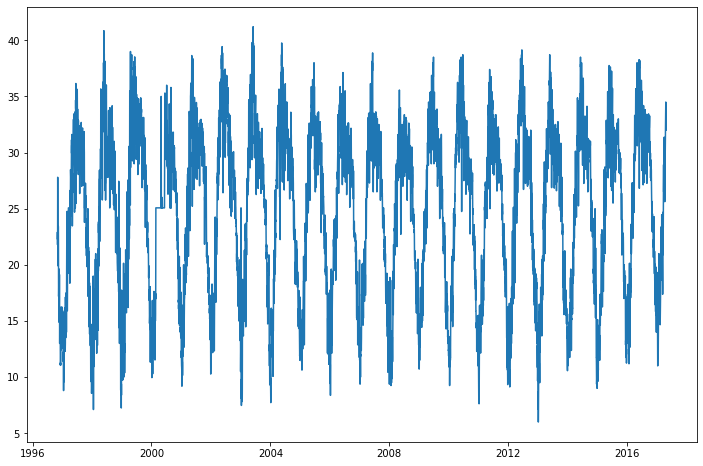

In [18]:
plt.figure(figsize=(12,8))
plt.plot(weather_data.set_index(["ds"]))

In [19]:
model = Prophet()
model.fit(weather_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = model.make_future_dataframe(periods=365,freq="D")
future.tail()

,ds
7840,2018-04-20
7841,2018-04-21
7842,2018-04-22
7843,2018-04-23
7844,2018-04-24


In [21]:

future.head()

,ds
0,1996-11-01
1,1996-11-02
2,1996-11-03
3,1996-11-04
4,1996-11-05


In [22]:
forecast = model.predict(future)

In [23]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-11-01,23.521637,18.192272,24.270844,23.521637,23.521637,-2.256154,-2.256154,-2.256154,-0.062900,-0.062900,-0.062900,-2.193254,-2.193254,-2.193254,0.0,0.0,0.0,21.265483
1,1996-11-02,23.523379,18.029918,24.163600,23.523379,23.523379,-2.360807,-2.360807,-2.360807,0.003322,0.003322,0.003322,-2.364128,-2.364128,-2.364128,0.0,0.0,0.0,21.162573
2,1996-11-03,23.525122,18.146886,24.294662,23.525122,23.525122,-2.547109,-2.547109,-2.547109,-0.011382,-0.011382,-0.011382,-2.535727,-2.535727,-2.535727,0.0,0.0,0.0,20.978013
3,1996-11-04,23.526864,17.764494,23.976821,23.526864,23.526864,-2.715783,-2.715783,-2.715783,-0.007156,-0.007156,-0.007156,-2.708628,-2.708628,-2.708628,0.0,0.0,0.0,20.811080
4,1996-11-05,23.528606,17.516909,23.481977,23.528606,23.528606,-2.905169,-2.905169,-2.905169,-0.021823,-0.021823,-0.021823,-2.883346,-2.883346,-2.883346,0.0,0.0,0.0,20.623437


In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7840,2018-04-20,32.513276,29.620370,35.426332
7841,2018-04-21,32.724116,29.553399,35.886875
7842,2018-04-22,32.853331,29.665297,35.931091
7843,2018-04-23,33.000876,29.832871,35.969970
7844,2018-04-24,33.128920,30.029700,36.339160


In [25]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1996-11-01,21.265483,18.192272,24.270844
1,1996-11-02,21.162573,18.029918,24.163600
2,1996-11-03,20.978013,18.146886,24.294662
3,1996-11-04,20.811080,17.764494,23.976821
4,1996-11-05,20.623437,17.516909,23.481977


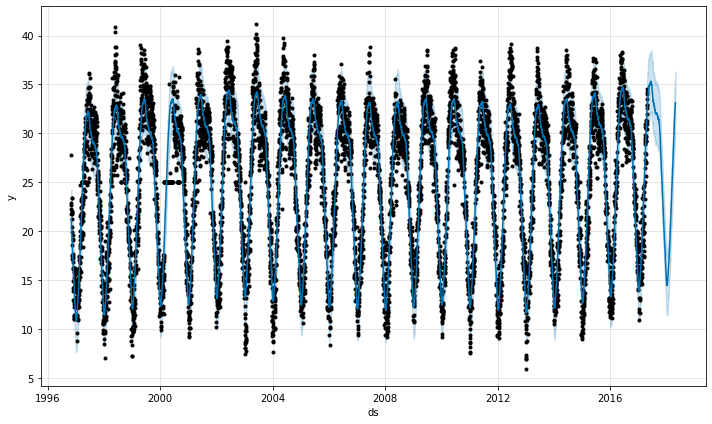

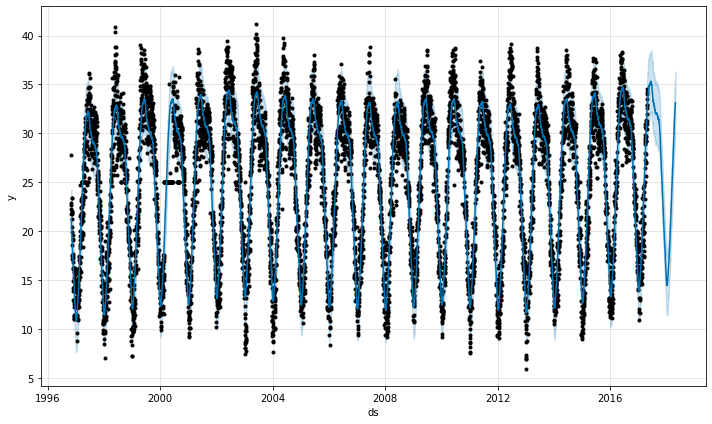

In [26]:
model.plot(forecast)

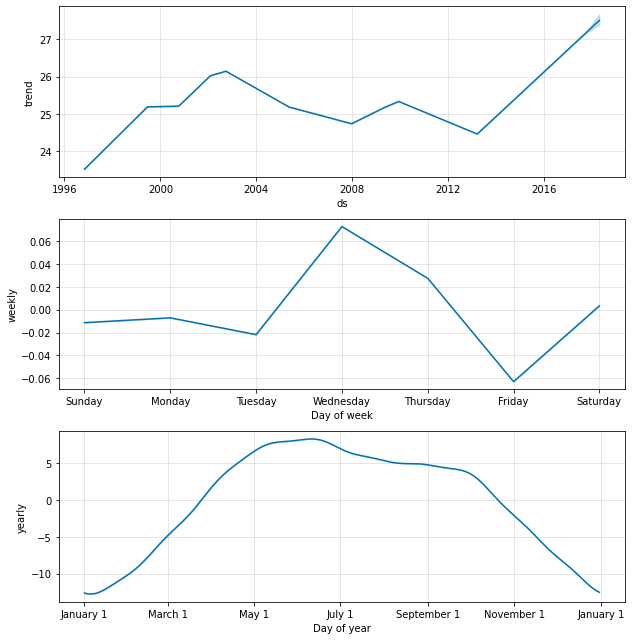

In [27]:

fig = model.plot_components(forecast)

In [28]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 36 forecasts with cutoffs between 1999-01-24 00:00:00 and 2016-04-24 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1999-01-25,13.719397,10.574433,16.837971,13.20,1999-01-24
1,1999-01-26,13.860526,10.812646,17.146104,10.00,1999-01-24
2,1999-01-27,14.041650,11.015830,17.099585,17.75,1999-01-24
3,1999-01-28,14.115146,11.226628,17.254874,11.75,1999-01-24
4,1999-01-29,13.887185,10.754790,16.799259,11.20,1999-01-24


In [29]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,6.853411,2.617902,2.065823,0.100862,0.073711,0.799848
1,38 days,6.851475,2.617532,2.071824,0.101032,0.073711,0.797945
2,39 days,6.882861,2.623521,2.080719,0.101145,0.074131,0.794521
3,40 days,6.925709,2.631674,2.086371,0.101144,0.074186,0.792237
4,41 days,7.032192,2.651828,2.094893,0.100933,0.074186,0.788432


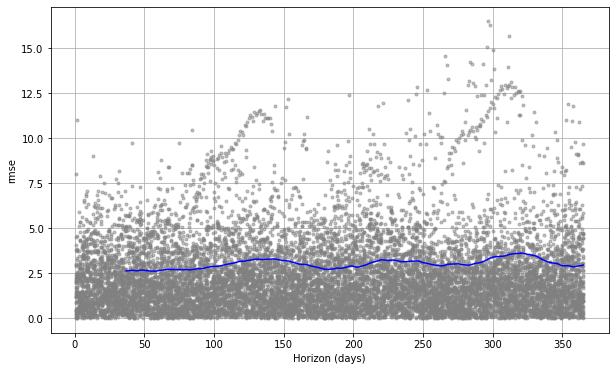

In [30]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
import pickle
pickle.dump( model, open( "weather_prediction.pickle", "wb" ) )